In [1]:
import bbbfs_algorithms
import networkit as nk
import numpy as np
import bbbfs_algorithms
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def powerlaw_dist(tau=2.5, x_min=1, n=1000):
    """sample from a tau exponent power law distribution
    pdf: prop to x^-(a+1), i.e. tau = a+1
    mean: ((tau-1) x_min)/(tau - 2) for tau > 2
    x_min: support is [x_min, inf]
    size: number of samples to draw
    """
    a = tau-1
    pareto = (np.random.pareto(a, size=n) + 1) * x_min
    return pareto

1000
0
1
2
3
avg_work: 28.0
log_n(avg_work): 0.4823860104474064
10000
0
1
2
3
avg_work: 43.0
log_n(avg_work): 0.4083671138948966
100000
0
1
2
3
avg_work: 79.0
log_n(avg_work): 0.3795254182580883
200000
0
1
2
3
avg_work: 17.0
log_n(avg_work): 0.23211506488073624
400000
0
1
2
3
avg_work: 40.0
log_n(avg_work): 0.28597694309021415
700000
0
1
2
3
avg_work: 153.0
log_n(avg_work): 0.37376471974664605
1000000
0
1
2
3
avg_work: 174.0
log_n(avg_work): 0.3734248747137666
3000000
0
1
2
3
avg_work: 189.0
log_n(avg_work): 0.3514619712444726
5000000
0
1
2
3
avg_work: 272.0
log_n(avg_work): 0.3634243626196839


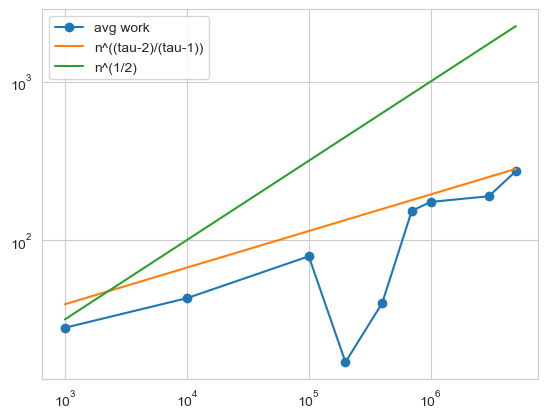

In [6]:
def do_stuff(tau, ns, num_cl_per_n=4, pairs=5000):
    ns = np.array(ns)
    avg_work_list = []
    for n in ns:
        print(n)
        for _ in range(num_cl_per_n):
            print(_)
            degree_seq = 2 * powerlaw_dist(tau=tau, x_min=1, n=n)
            gen = nk.generators.ChungLuGenerator(degree_seq)
            g = gen.generate()

            us = np.random.choice(n, size=pairs)
            vs = np.random.choice(n, size=pairs)
            avg_works = []

            for i, u in enumerate(us):
                v = vs[i]
                
                bbfs = bbbfs_algorithms.BiBFS(g, u, v)
                dist = bbfs.run()
                avg_works.append(len(bbfs.sBFS.seen) + len(bbfs.tBFS.seen))

        avg_work = np.median(avg_works)


        print(f'avg_work: {avg_work}')
        print(f'log_n(avg_work): {np.emath.logn(n, avg_work)}')
        avg_work_list.append(avg_work)


    plt.plot(ns, avg_work_list, label='avg work', marker='o')
    plt.plot(ns, 8*ns**((tau-2)/(tau-1)), label='n^((tau-2)/(tau-1))')
    plt.plot(ns, ns**(1/2), label='n^(1/2)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

do_stuff(2.3, list(map(int, [1000, 10000, 100000, 200000, 400000, 700000, 1e6, 3e6, 5e6])))
# do_stuff(2.3, [1000])

# do_stuff(2.3, list(map(int, [1000, 10000, 100000])))

1000
0
1
2
3
avg work: 43.6056
log_n(avg_work): 0.5465140888764201
10000
0
1
2
3
avg work: 91.63815
log_n(avg_work): 0.49051907825651836
100000
0
1
2
3
avg work: 394.7365
log_n(avg_work): 0.5192614572100314


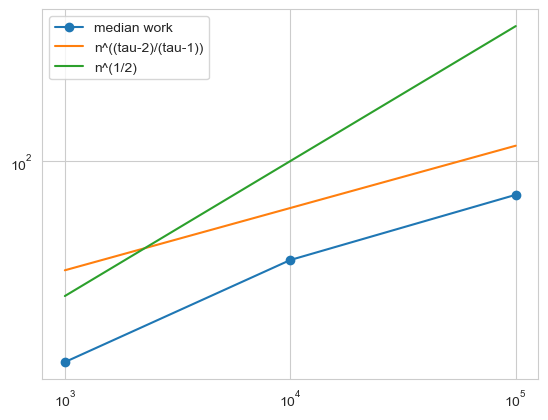

In [3]:
def do_stuff_exact(tau, ns, num_cl_per_n=4, pairs=5000):
    ns = np.array(ns)
    median_work_list = []
    avg_work_list = []
    top_work_list = []
    all_works = []
    for n in ns:
        print(n)
        
        works = []
        for _ in range(num_cl_per_n):
            print(_)
            degree_seq = 2 * powerlaw_dist(tau=tau, x_min=1, n=n)
            gen = nk.generators.ChungLuGenerator(degree_seq)
            g = gen.generate()

            us = np.random.choice(n, size=pairs)
            vs = np.random.choice(n, size=pairs)


            for i, u in enumerate(us):
                v = vs[i]
                
                bbfs = bbbfs_algorithms.BiBFS_ExactCheckDirectEdges(g, u, v)
                dist = bbfs.run()
                work = len(bbfs.sBFS.seen) + len(bbfs.tBFS.seen)
                works.append(work)
                all_works.append((n, work))

        
        median_work_list.append(np.median(works))
        avg_work = np.mean(works)


        print(f'avg work: {avg_work}')
        print(f'log_n(avg_work): {np.emath.logn(n, avg_work)}')
        avg_work_list.append(avg_work)


    plt.plot(ns, median_work_list, label='median work', marker='o')
    plt.plot(ns, 8*ns**((tau-2)/(tau-1)), label='n^((tau-2)/(tau-1))')
    plt.plot(ns, ns**(1/2), label='n^(1/2)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    return all_works

# all_works = do_stuff_exact(2.3, list(map(int, [1000, 10000, 100000, 200000, 400000, 700000, 1e6, 3e6, 5e6])))
# all_works = do_stuff_exact(2.3, list(map(int, [1000, 10000, 100000, 200000])))#, 400000, 700000, 1e6, 3e6, 5e6])))

# all_works = do_stuff_exact(2.3, list(map(int, [1000, 10000, 100000, 200000, 400000, 700000, 1e6, 3e6])))

# do_stuff(2.3, [1000])

all_works = do_stuff_exact(2.3, list(map(int, [1000, 10000, 100000])))

In [5]:
bbfs.sBFS.queue

NameError: name 'bbfs' is not defined

In [29]:
import pandas as pd
df = pd.DataFrame(all_works)
df.columns = ['n', 'work']
# df.to_csv('df_exact_queue_expanded')

In [22]:
top_percentiles = df.groupby('n').agg(lambda x: np.quantile(x, 0.95))

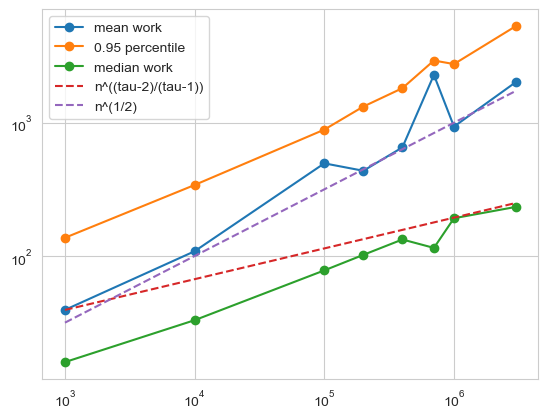

In [31]:
tau=2.3

ns = df.n.unique()
top_percentiles = df.groupby('n').agg(lambda x: np.quantile(x, 0.95))
means = df.groupby('n').mean().values
medians = df.groupby('n').median()
plt.plot(ns, means, label='mean work', marker='o')
plt.plot(ns, top_percentiles, label='0.95 percentile', marker='o')
plt.plot(ns, medians, label='median work', marker='o')

plt.plot(ns, 8*ns**((tau-2)/(tau-1)), label='n^((tau-2)/(tau-1))', ls='--')
plt.plot(ns, ns**(1/2), label='n^(1/2)', ls='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.plot(ns, median_work_list, label='median work', marker='o')
plt.plot(ns, 8*ns**((tau-2)/(tau-1)), label='n^((tau-2)/(tau-1))')
plt.plot(ns, ns**(1/2), label='n^(1/2)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
degs = []

for _ in range(6):
    print(_)
    tau=2.3
    n= int(5e6)


    degree_seq = 2 * powerlaw_dist(tau=tau, x_min=1, n=n)
    gen = nk.generators.ChungLuGenerator(degree_seq)
    g = gen.generate()

    for _ in range(2000):

        u = np.random.choice(n)
        v = np.random.choice(n)
        if g.degree(u) == 0 or g.degree(v) == 0:
            continue

        bbfs = bbbfs_algorithms.BiBFS(g, u, v)
        found = bbfs.run()
        if not found:
            continue
        avg_work = len(bbfs.sBFS.seen) + len(bbfs.tBFS.seen)

        dist = len(bbfs.path)

        w_star = n**(tau-2)/(tau-1)

        a, b = bbfs.sBFS, bbfs.tBFS
        # a_expanded_max_layer = max([a.seen[u] for u in a.expanded])
        # a_expanded_degrees = []
        # for layer in range(a_expanded_max_layer + 1):
        #     for u in a.


        a_expanded_degrees = [g.degree(u) for u in a.expanded]
        b_expanded_degrees = [g.degree(u) for u in b.expanded]
        
        if len(a_expanded_degrees) == 0 or len(b_expanded_degrees) == 0:
            continue
            
        degs.append(a_expanded_degrees)
        degs.append(b_expanded_degrees)
        
    
    
all_degs = []
weights = []
for deg in degs:
    all_degs += deg
    weights += [1/len(deg)]*len(deg)
    
all_degs = np.array(all_degs)
weights = np.array(weights)


0


In [144]:
np.emath.logn(10, n**((tau-2)/(tau-1)))

1.6666666666666665

In [100]:
all_degs = np.array(all_degs)
weights = np.array(weights)

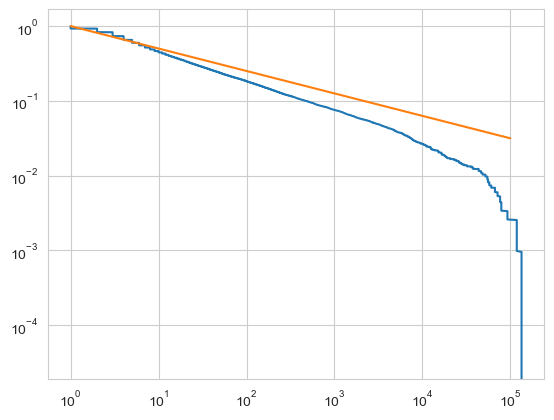

In [118]:
sorted_indices = np.argsort(all_degs)
temp = np.cumsum(weights[sorted_indices])
temp = temp/temp[-1]
plt.plot(all_degs[sorted_indices], temp[-1] - temp)

ws = np.arange(1, 1e5)
plt.plot(ws, ws**(2-tau))

plt.xscale('log')
plt.yscale('log')

In [145]:
bbfs.path

[3489635, 51, 221, 348811, 3969736]

(0.0, 100.0)

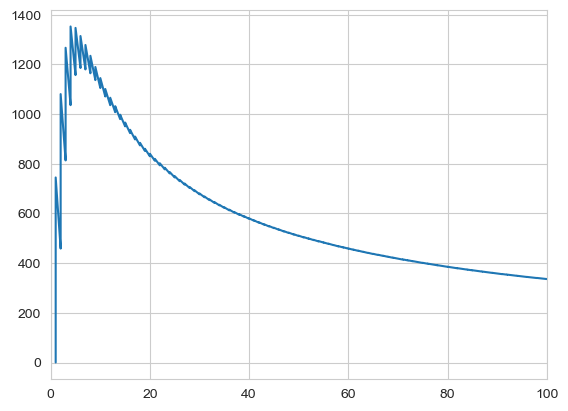

In [108]:
sorted_indices = np.argsort(all_degs)
plt.plot(all_degs[sorted_indices], np.cumsum(weights[sorted_indices])/np.power(all_degs[sorted_indices], 3 - tau))
plt.xlim([0, 100])

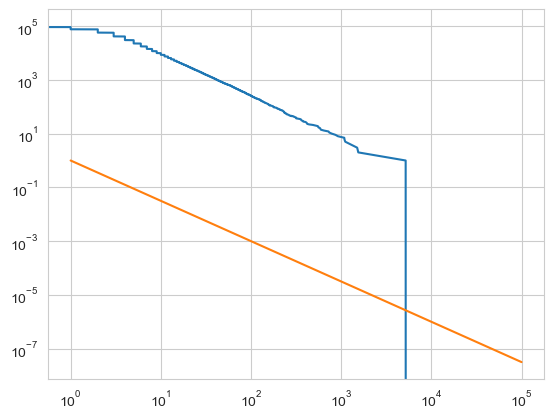

In [140]:
n = 100000
tau=2.5

degree_seq = 2 * powerlaw_dist(tau=tau, x_min=1, n=n)
gen = nk.generators.ChungLuGenerator(degree_seq)
g = gen.generate()


g_degs = [g.degree(u) for u in g.iterNodes()]
g_degs = sorted(g_degs)

# g_degs = sorted(degree_seq)

# temp = np.cumsum(g_degs)
# temp = temp/temp[-1]
temp = np.arange(0, len(g_degs))
plt.plot(g_degs, temp[-1] - temp)

ws = np.arange(1, 1e5)
plt.plot(ws, ws**(1-tau))

plt.xscale('log')
plt.yscale('log')

array([12626,  2220, 13365, ...,  1572,  1299,    90])

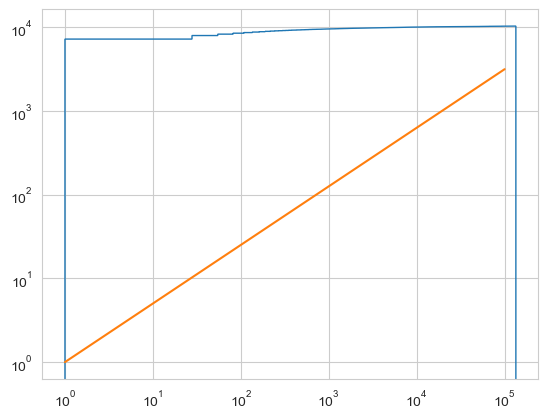

In [91]:
# np.histogram(all_degs, density=True, weights=weights)

_ = plt.hist(all_degs, bins=5000, weights=weights, cumulative=True, histtype='step')
ws = np.arange(1, 1e5)
plt.plot(ws, ws**(3-tau))

plt.yscale('log')
plt.xscale('log')

(array([8.16666667, 0.        , 0.16666667, 0.        , 0.33333333,
        0.        , 0.        , 0.33333333, 0.5       , 0.5       ]),
 array([1.0000e+00, 6.0110e+02, 1.2012e+03, 1.8013e+03, 2.4014e+03,
        3.0015e+03, 3.6016e+03, 4.2017e+03, 4.8018e+03, 5.4019e+03,
        6.0020e+03]),
 <BarContainer object of 10 artists>)

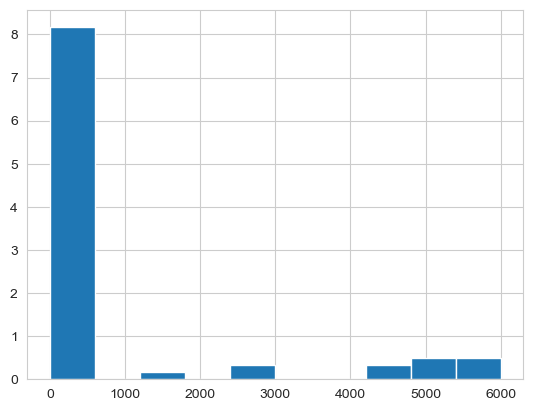

In [41]:
plt.hist(all_degs, weights=weights)

In [36]:
all_degs = []
weights = []
for deg in degs:
    all_degs += deg
    weights += [1/len(deg)]*len(deg)

In [37]:
all_degs

[34,
 3,
 2771,
 2,
 3,
 27,
 3,
 4769,
 5,
 5,
 5073,
 2,
 8,
 1641,
 3,
 5,
 16,
 15,
 1,
 12,
 28,
 11,
 2,
 1,
 6002,
 4]

In [38]:
weights

[0.5,
 0.5,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.5,
 0.5,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.5,
 0.5,
 1.0]

In [30]:
a_expanded_degrees
b_expanded_degrees

[7]

[38]

In [31]:
bbfs.path

[2615, 0, 32971]

In [27]:
a.expanded

{2078, 38924}

In [25]:
w_star = n**(tau-2)/(tau-1)
w_star

24.325212770525948

In [26]:
g.degree(2078)

44

In [23]:
bbfs.intersection_point

0

In [19]:
bbfs.path
avg_work

[38924, 2078, 0, 25722]

36

In [10]:
a, b = bbfs.sBFS, bbfs.tBFS

In [20]:
a.seen

{38924: 0,
 40444: 1,
 2078: 1,
 2323: 1,
 5542: 1,
 3450: 1,
 2117: 2,
 3160: 2,
 6200: 2,
 9007: 2,
 10994: 2,
 11691: 2,
 11996: 2,
 12072: 2,
 15728: 2,
 16827: 2,
 16977: 2,
 20003: 2,
 28950: 2,
 33427: 2,
 39019: 2,
 47825: 2,
 60957: 2,
 75055: 2,
 81722: 2,
 84470: 2}

In [21]:
a.node_to_parent[10994]
g.degree(10994)

2078

20

In [22]:
b.seen

{25722: 0,
 96126: 1,
 0: 1,
 6: 1,
 58: 1,
 16420: 1,
 11571: 1,
 4115: 1,
 537: 1,
 702: 1}

In [12]:
bfs = bbfs.sBFS
bfs.queue

{1: [23190, 25234, 29061, 75300, 0, 3, 4585, 343]}

In [13]:
bfs.seen

{10806: 0, 23190: 1, 25234: 1, 29061: 1, 75300: 1, 0: 1, 3: 1, 4585: 1, 343: 1}

In [14]:
{u: g.degree(u) for u in bfs.seen}

{10806: 8,
 23190: 9,
 25234: 4,
 29061: 2,
 75300: 3,
 0: 20236,
 3: 4890,
 4585: 23,
 343: 126}

In [21]:
set(bbfs.tBFS.seen).intersection(bfs.seen)

set()

In [16]:
u, v

(10806, 33658)